# Logistic regression

#  EDA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,KFold
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.duplicated().sum()

0

In [5]:
df=df.drop(columns='User ID')

In [6]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: >

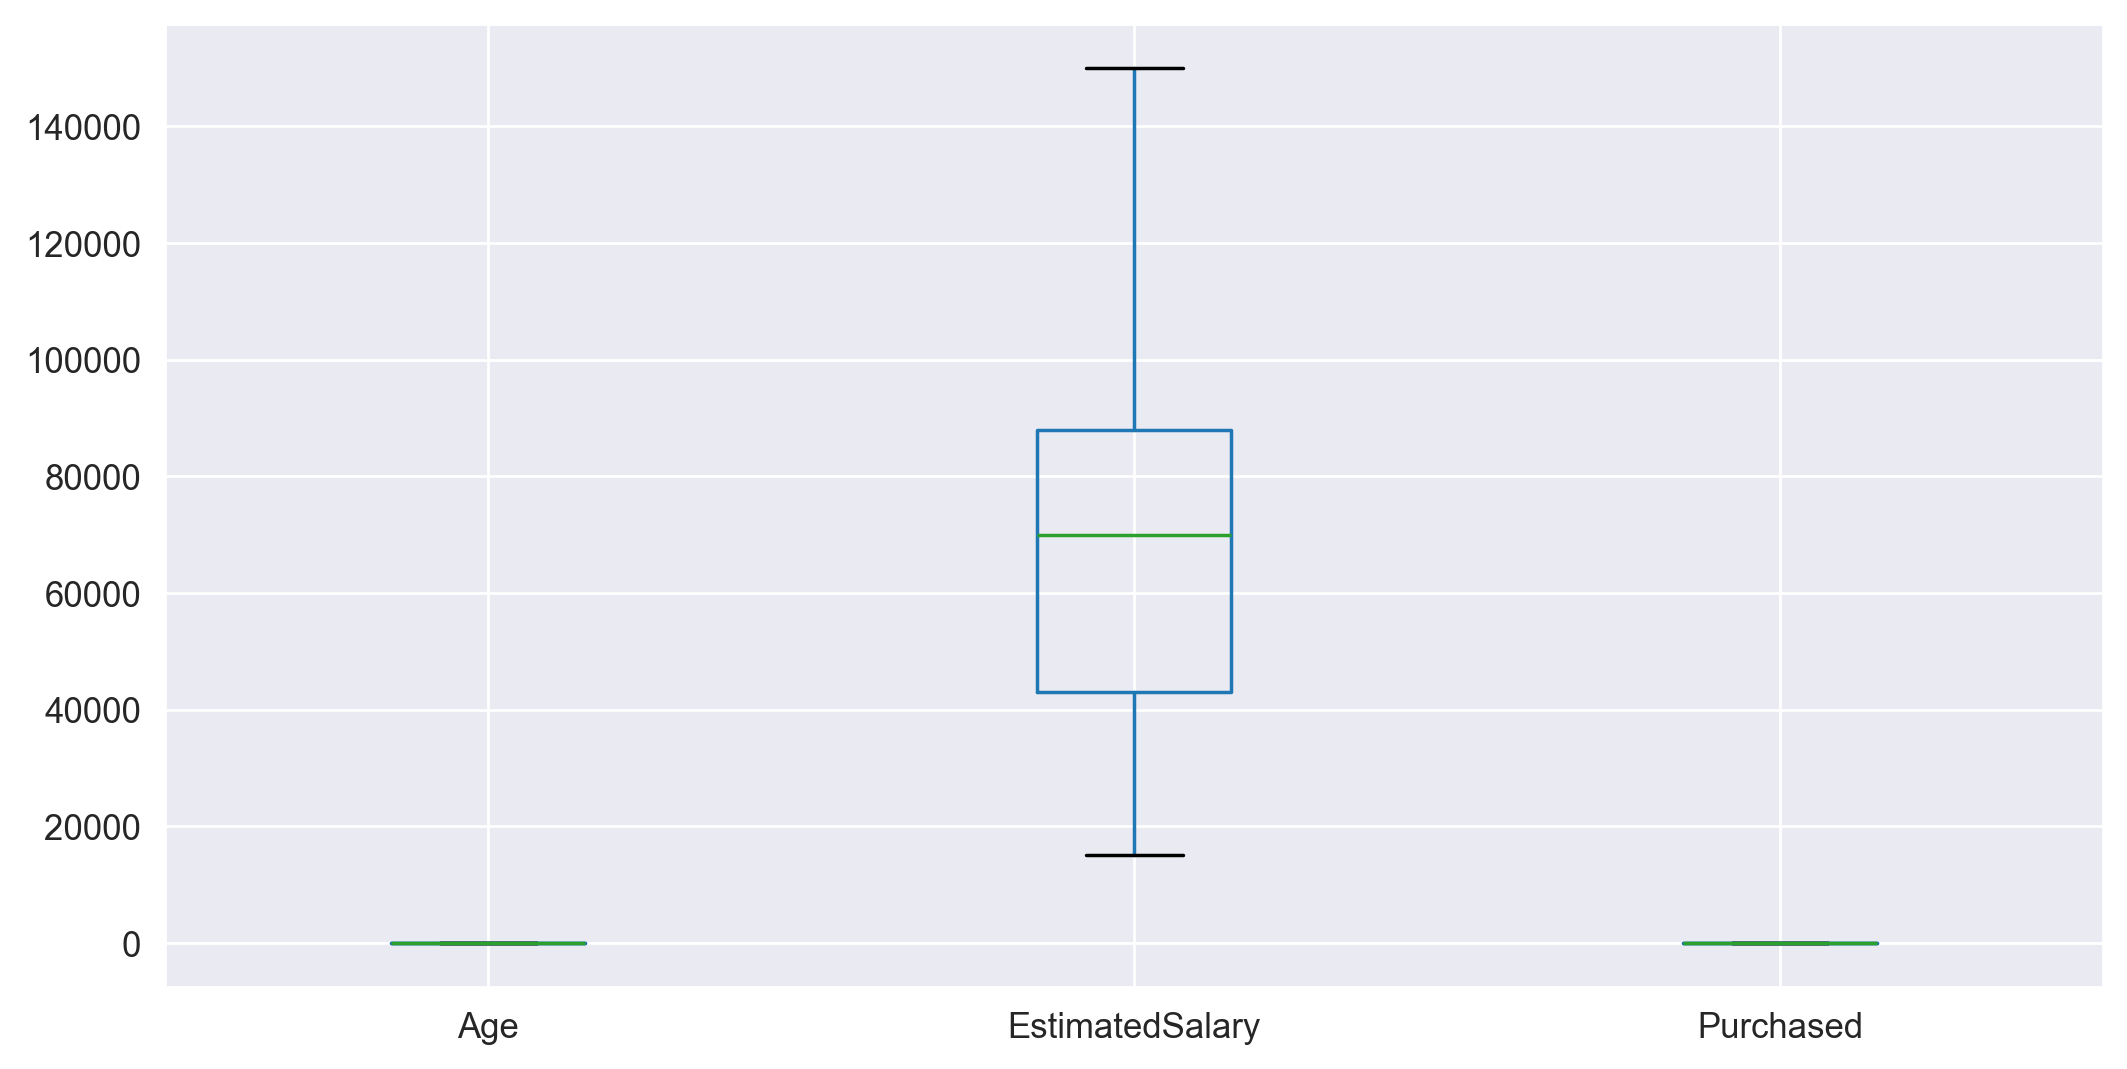

In [7]:
df.boxplot()

In [8]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Purchased'}>, <Axes: >]], dtype=object)

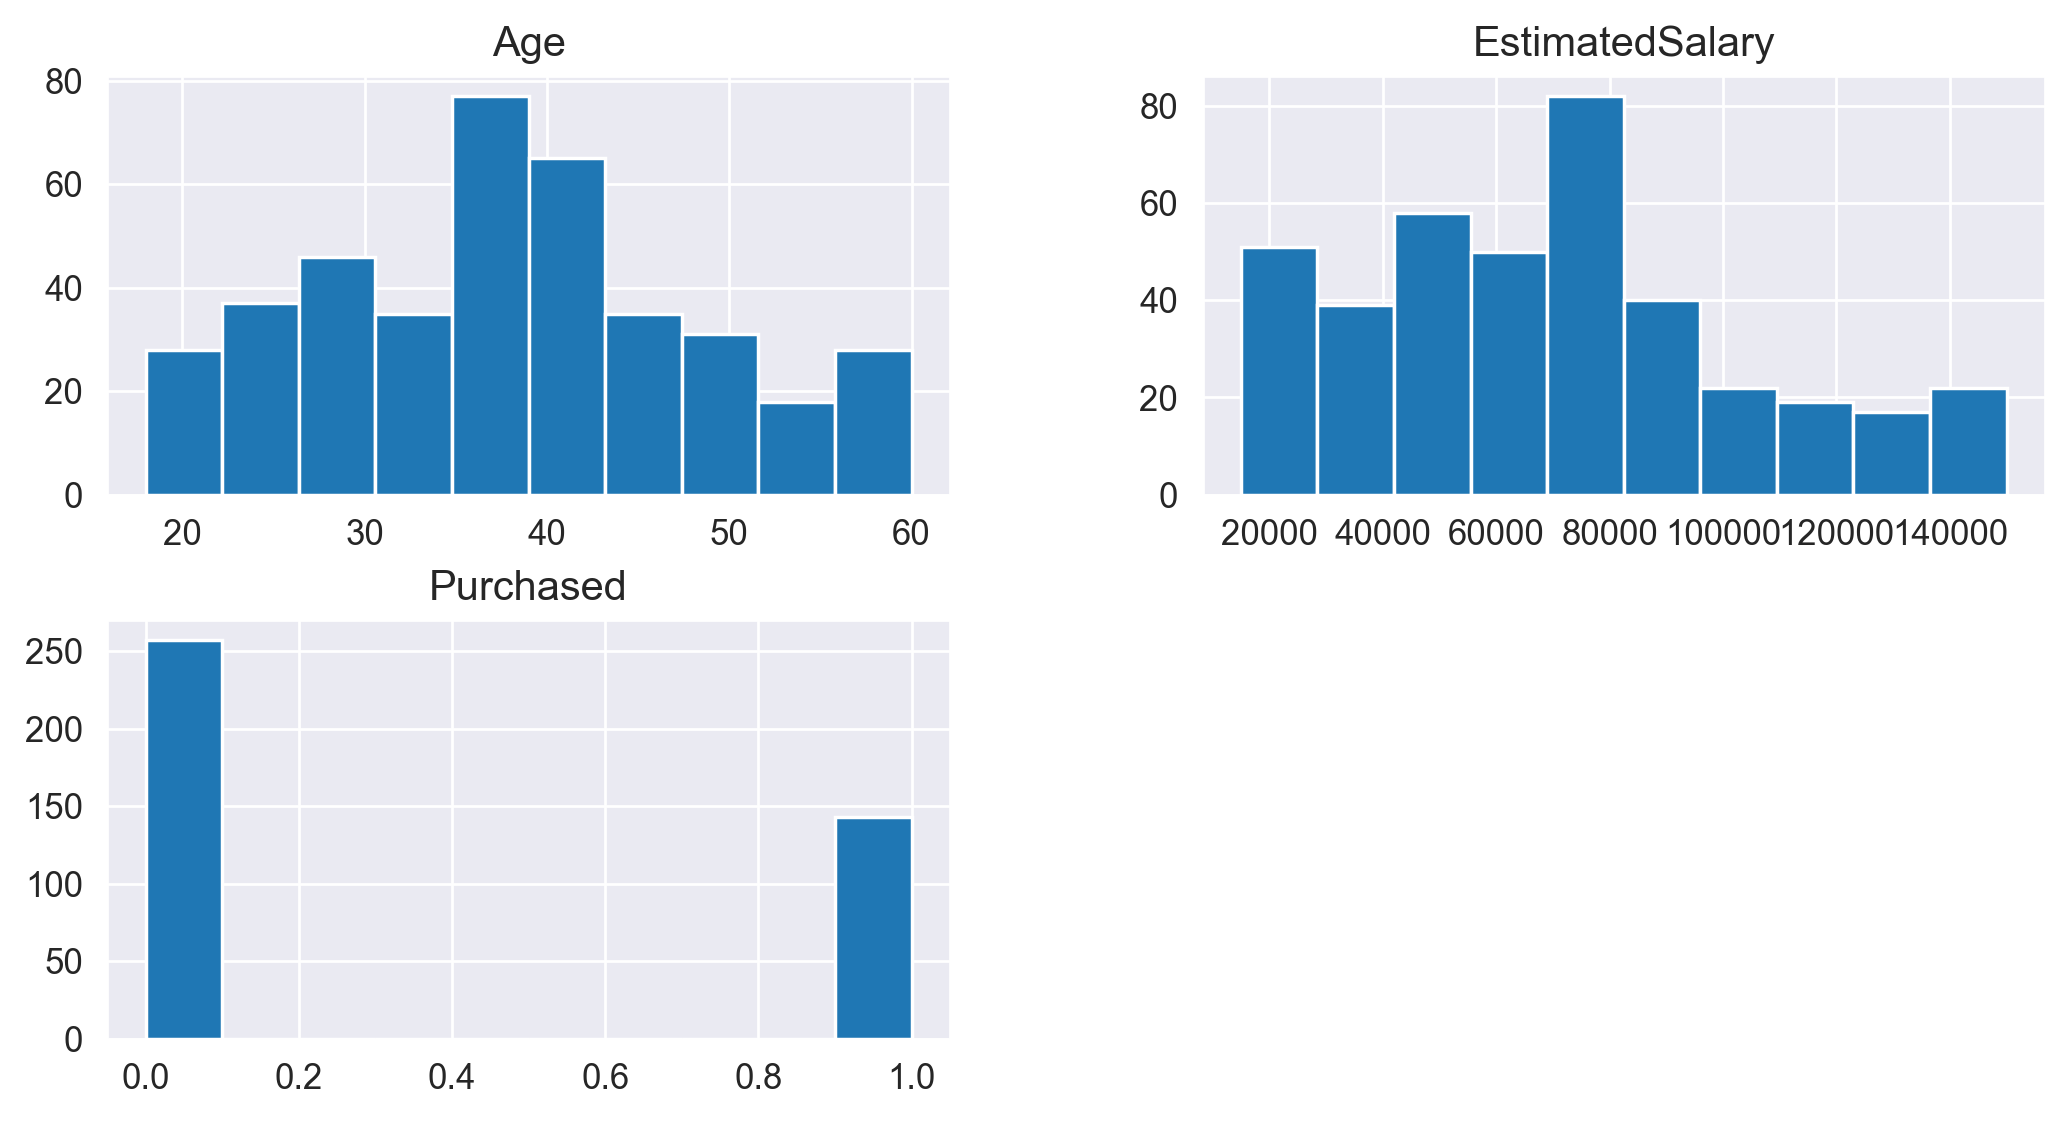

In [9]:
df.hist()

In [42]:
df.skew()

Gender            -0.040159
Age                0.231337
EstimatedSalary    0.495024
Purchased          0.596903
dtype: float64

In [10]:
df['Gender']=df['Gender'].replace({'Male': 0, 'Female': 1})

In [11]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [13]:
x=df.iloc[:,:-1]
y=df['Purchased']

In [14]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [34]:
ypred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [35]:
report=classification_report(ytest,ypred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.76      0.81      0.79        32

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.83      0.82      0.83        80



In [36]:
train_accuracy=lr.score(xtrain,ytrain)
test_accuracy=lr.score(xtest,ytest)

In [37]:
train_accuracy

0.85

In [38]:
test_accuracy

0.825

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)
accuracy = accuracy_score(ytest, ypred)

# Output the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 0.7647058823529411
Recall: 0.8125
F1 Score: 0.7878787878787878
Accuracy: 0.825


In [57]:
threshold = 0.5
y_pred_bin = (ypred >= threshold).astype(int)
y_pred=ypred
y_test=ytest
# Confusion Matrix (TP, TN, FP, FN)
TP = np.sum((y_test == 1) & (y_pred_bin == 1))  # True Positives
TN = np.sum((y_test == 0) & (y_pred_bin == 0))  # True Negatives
FP = np.sum((y_test == 0) & (y_pred_bin == 1))  # False Positives
FN = np.sum((y_test == 1) & (y_pred_bin == 0))  # False Negatives

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
precision = TP / (TP + FP) if (TP + FP) != 0 else 0

# Calculate Recall
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"Accuracy: {accuracy}")

Precision: 0.7647058823529411
Recall: 0.8125
F1 Score: 0.787878787878788
Accuracy: 0.825


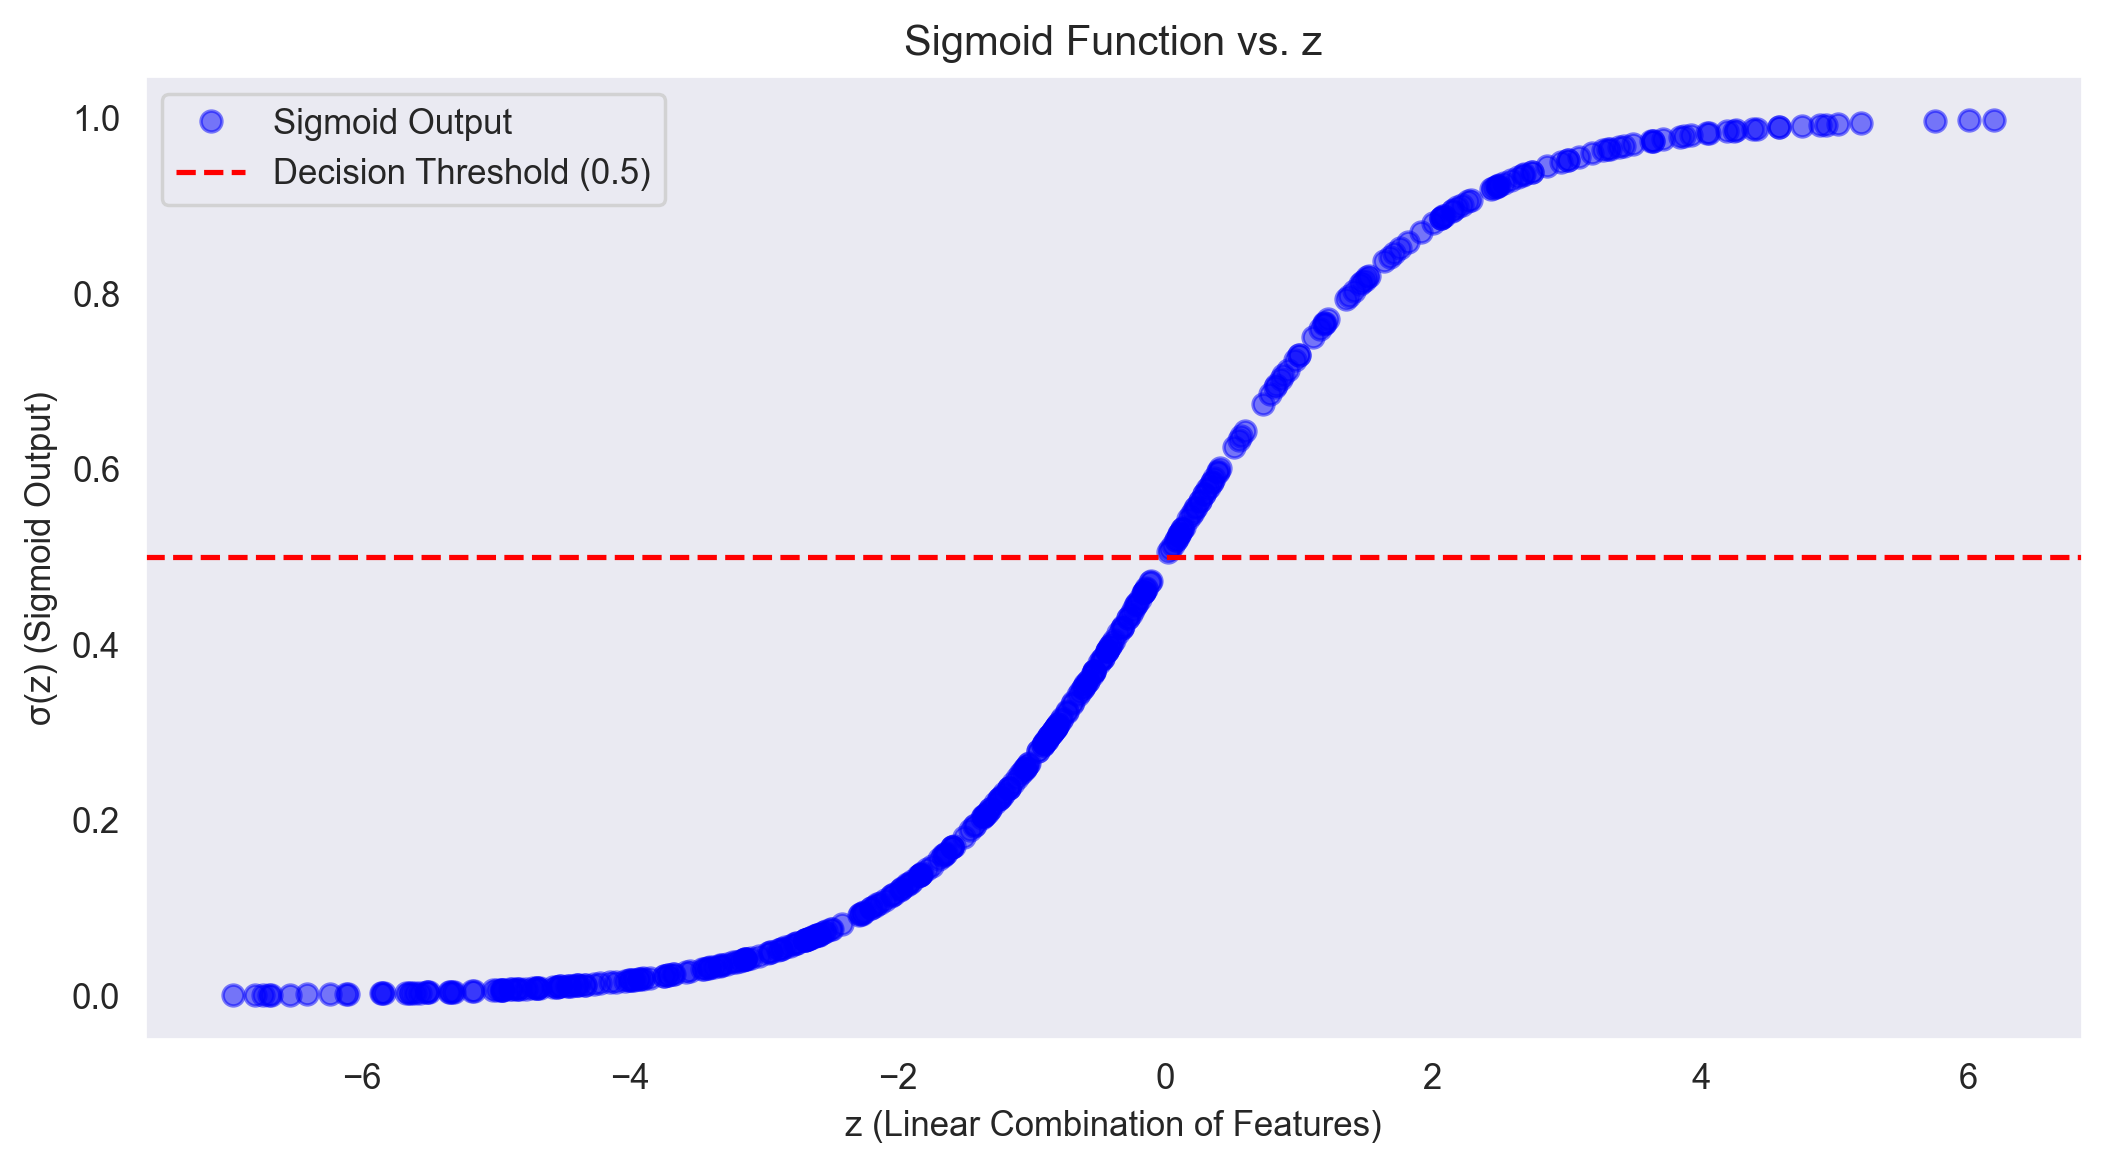

In [58]:
X = df[['Gender', 'Age', 'EstimatedSalary']].values
y = df['Purchased'].values


scaler = StandardScaler()
X = scaler.fit_transform(X)

model = LogisticRegression()
model.fit(X, y)

# Compute z = wX + b
z = np.dot(X, model.coef_.T) + model.intercept_
sigmoid = 1 / (1 + np.exp(-z))


plt.plot(z, sigmoid, 'bo', alpha=0.5, label="Sigmoid Output")
plt.xlabel("z (Linear Combination of Features)")
plt.ylabel("σ(z) (Sigmoid Output)")
plt.title("Sigmoid Function vs. z")
plt.axhline(0.5, color="red", linestyle="--", label="Decision Threshold (0.5)")
plt.legend()
plt.grid()


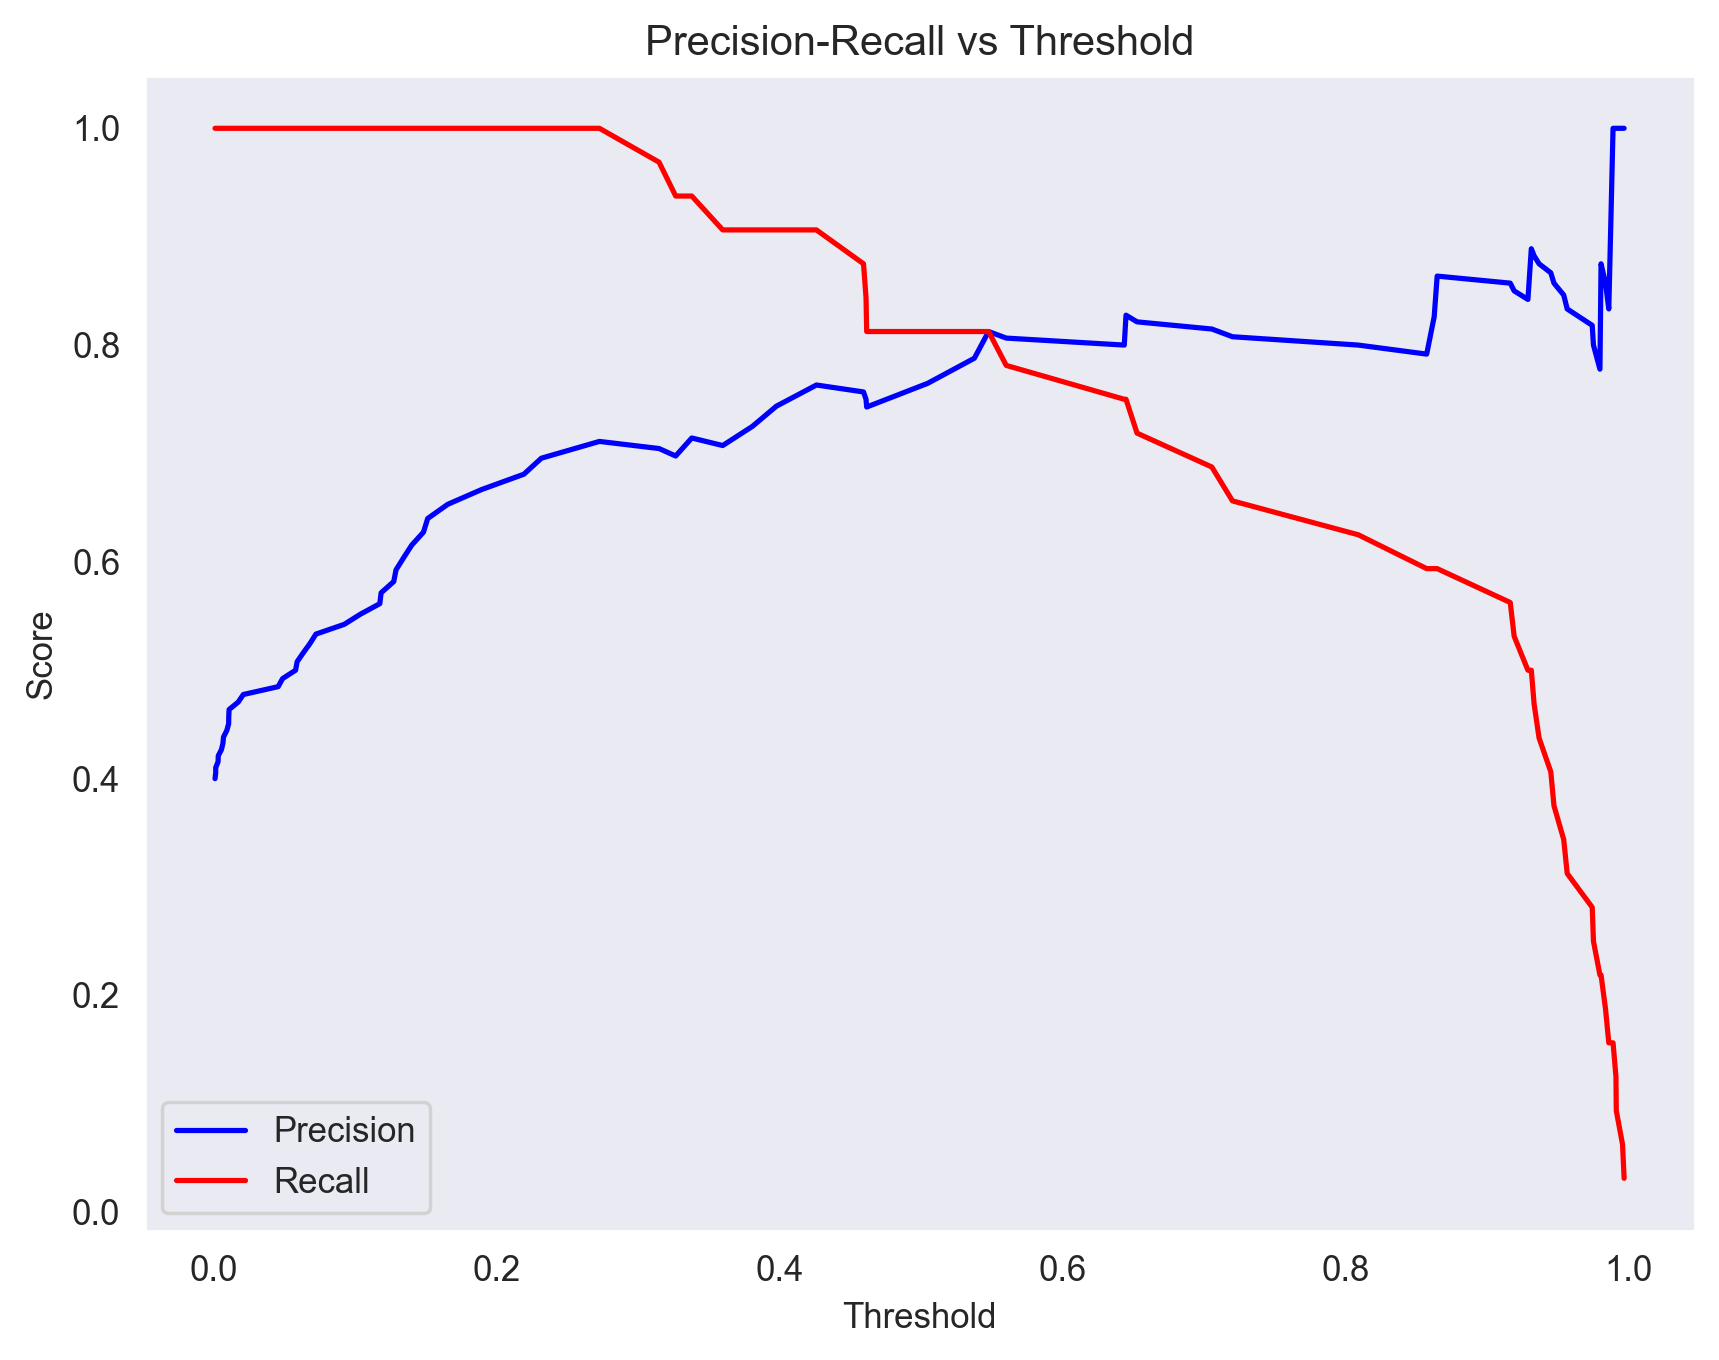

In [59]:

yprobs = lr.predict_proba(xtest)[:, 1]  

# Step 4: Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(ytest, yprobs)

# Step 5: Plot Precision-Recall vs Threshold Curve
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label="Precision", color='b')
plt.plot(thresholds, recall[:-1], label="Recall", color='r')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.grid()
plt.show()

